### Geração de Mapa Interativo (HTML)

Utilizaremos a biblioteca Folium em conjunto com a API da OpenRouteService para criar um mapa interativo em formato HTML. Esse mapa permitirá uma visualização mais clara e intuitiva da posição das cidades-alvo em relação ao centro de distribuição, localizado em São Bernardo do Campo facilitando a análise.

In [ ]:
# Importações das bibliotecas necessárias

import pandas as pd  # Manipulação de dados
import matplotlib.pyplot as plt  # Geração de gráficos
import folium  # Biblioteca para criar mapas interativos e marcar localizações geográficas
import geopy.distance  # Ferramenta para calcular a distância entre dois pontos geográficos com latitude e longitude
import openrouteservice  # Biblioteca que permite acessar a API do OpenRouteService para calcular rotas reais entre locais
from openrouteservice import convert  # Função utilizada para converter dados de rotas em formatos compatíveis (como GeoJSON)

### Primeiro mapa apenas para visualizar as filiais e centro de distribuição

In [ ]:
# Coordenadas aproximadas das cidades
cidades = {
    "São Bernardo do Campo": [-23.6914, -46.5658],
    "Belém": [-1.4558, -48.5020],
    "Manaus": [-3.1190, -60.0217],
    "Boa Vista": [2.8235, -60.6758],
    "Ananindeua": [-1.3639, -48.3725],
    "Rio Branco": [-9.9740, -67.8114],
    "Macapá": [0.0349, -51.0695],
    "Santarém": [-2.4385, -54.6996],
    "Parauapebas": [-6.0671, -49.9037],
    "Marabá": [-5.3686, -49.1172]
}

# Criando o mapa centrado em São Bernardo do Campo
mapa = folium.Map(location=cidades["São Bernardo do Campo"], zoom_start=5)

# Adicionando marcadores para cada cidade
for city, coords in cidades.items():
    folium.Marker(coords, popup=city, tooltip=city).add_to(mapa)

# Salvar o mapa em um arquivo HTML
# mapa.save("mapa_cidades.html")

print("Mapa gerado! Abra o arquivo 'mapa_cidades.html' no navegador para visualizar.")

Mapa gerado! Abra o arquivo 'mapa_cidades.html' no navegador para visualizar.


### Determinando um ponto Central entre estas cidades (Uma possível melhor cidade para a construção de um CD2)

In [ ]:
# Coordenadas aproximadas das cidades
cidades = {
    "Belém": (-1.4558, -48.5020),
    "Manaus": (-3.1190, -60.0217),
    "Boa Vista": (2.8235, -60.6758),
    "Ananindeua": (-1.3639, -48.3725),
    "Rio Branco": (-9.9740, -67.8114),
    "Macapá": (0.0349, -51.0695),
    "Santarém": (-2.4385, -54.6996),
    "Parauapebas": (-6.0671, -49.9037),
    "Marabá": (-5.3686, -49.1172)
}

# Calculando o ponto médio
avg_lat = sum(lat for lat, lon in cidades.values()) / len(cidades)
avg_lon = sum(lon for lat, lon in cidades.values()) / len(cidades)
central_point = (avg_lat, avg_lon)

# Calculando distâncias até o ponto central
distances = {city: geopy.distance.distance(central_point, coords).km for city, coords in cidades.items()}

# Cidade mais próxima ao ponto médio
closest_city = min(distances, key=distances.get)

print(f"Ponto central estimado: {central_point}")
print(f"Cidade mais próxima do ponto central: {closest_city}, a {distances[closest_city]:.2f} km")

Ponto central estimado: (-2.9920555555555555, -54.46371111111111)
Cidade mais próxima do ponto central: Santarém, a 66.59 km


In [ ]:
# Exibindo as cidades em um mapa com o ponto central

# Coordenadas aproximadas das cidades
cidades = {
    "São Bernardo do Campo": [-23.6914, -46.5658],
    "Belém": [-1.4558, -48.5020],
    "Manaus": [-3.1190, -60.0217],
    "Boa Vista": [2.8235, -60.6758],
    "Ananindeua": [-1.3639, -48.3725],
    "Rio Branco": [-9.9740, -67.8114],
    "Macapá": [0.0349, -51.0695],
    "Santarém": [-2.4385, -54.6996],
    "Parauapebas": [-6.0671, -49.9037],
    "Marabá": [-5.3686, -49.1172]
}

# Ponto central estimado
central_point = (-2.9920555555555555, -54.46371111111111)

# Criando o mapa centrado em São Bernardo do Campo
mapa = folium.Map(location=cidades["São Bernardo do Campo"], zoom_start=5)

# Adicionando marcadores para cada cidade (azul)
for city, coords in cidades.items():
    folium.Marker(coords, popup=city, tooltip=city, icon=folium.Icon(color="blue")).add_to(mapa)

# Adicionando o ponto central (vermelho)
folium.Marker(
    central_point,
    popup="Ponto Central",
    tooltip="Ponto Central",
    icon=folium.Icon(color="red")
).add_to(mapa)

# Salvar o mapa em um arquivo HTML
# mapa.save("mapa_cidades_com_ponto_central.html")

print("Mapa gerado! Abra o arquivo 'mapa_cidades_com_ponto_central.html' no navegador para visualizar.")

Mapa gerado! Abra o arquivo 'mapa_cidades_com_ponto_central.html' no navegador para visualizar.


In [ ]:
# Para usar rotas realistas com openrouteservice: https://openrouteservice.org/

client = openrouteservice.Client(key='5b3ce3597851110001cf6248a9ab76c8edd14c47b4a352fb10bc96d2')


In [ ]:
# Teste

# coords = [[-46.5658, -23.6914], [-48.5020, -1.4558]]  # CD → Belém
# rota = client.directions(coords, profile='driving-car', format='geojson')
# mapa.save("rota.html")

### Visualizando as rotas reais atual (SSZ --> CD (São Bernardo do C.) --> Filiais do Norte)

In [ ]:
# === Coordenadas dos pontos principais ===
pontos = {
    "Porto de Santos (SSZ)": (-23.9418, -46.3286),
    "CD - São Bernardo do Campo": (-23.6914, -46.5658),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Santarém": (-2.4385, -54.6996),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Ananindeua": (-1.3656, -48.3721),
    "Filial - Marabá": (-5.3686, -49.1172)
}

# === Criar o mapa ===
mapa = folium.Map(location=[-10, -52], zoom_start=4)

# === Função para traçar uma rota real no mapa ===
def rota_real(origem, destino, cor):
    # Inverte a ordem das coordenadas dos pontos de origem e destino
    # O OpenRouteService (ORS) exige a ordem (longitude, latitude)
    coords = (pontos[origem][::-1], pontos[destino][::-1]) # Inverte a lat e lon

    # Obtém a rota entre os pontos especificados utilizando o perfil 'driving-car'
    # O resultado é retornado no formato GeoJSON
    route = client.directions(coords, profile='driving-car', format='geojson')

    # Adiciona a rota ao mapa como um objeto GeoJson do Folium
    # Define um nome para a camada da rota e aplica a cor especificada
    folium.GeoJson(route, name=f"Rota: {origem} → {destino}", style_function=lambda x: {'color': cor}).add_to(mapa)

# === Marcadores ===
for nome, coord in pontos.items():
    cor = "blue" if "Filial" in nome else "green" if "CD" in nome else "red"
    folium.Marker(coord, popup=nome, icon=folium.Icon(color=cor)).add_to(mapa) # adiciona os marcadores

# === Rota real do Porto → CD ===
rota_real("Porto de Santos (SSZ)", "CD - São Bernardo do Campo", "black")

# === Rotas reais do CD → Filiais ===
for filial in [k for k in pontos if "Filial" in k]:
    rota_real("CD - São Bernardo do Campo", filial, "brown")

# === Salvar mapa ===
# mapa.save("rotas_logisticas_reais.html")


### Analisando a diferença da distância real entre um CD em São Bernardo do Campo VS. um CD em Santarém para as filiais do Norte

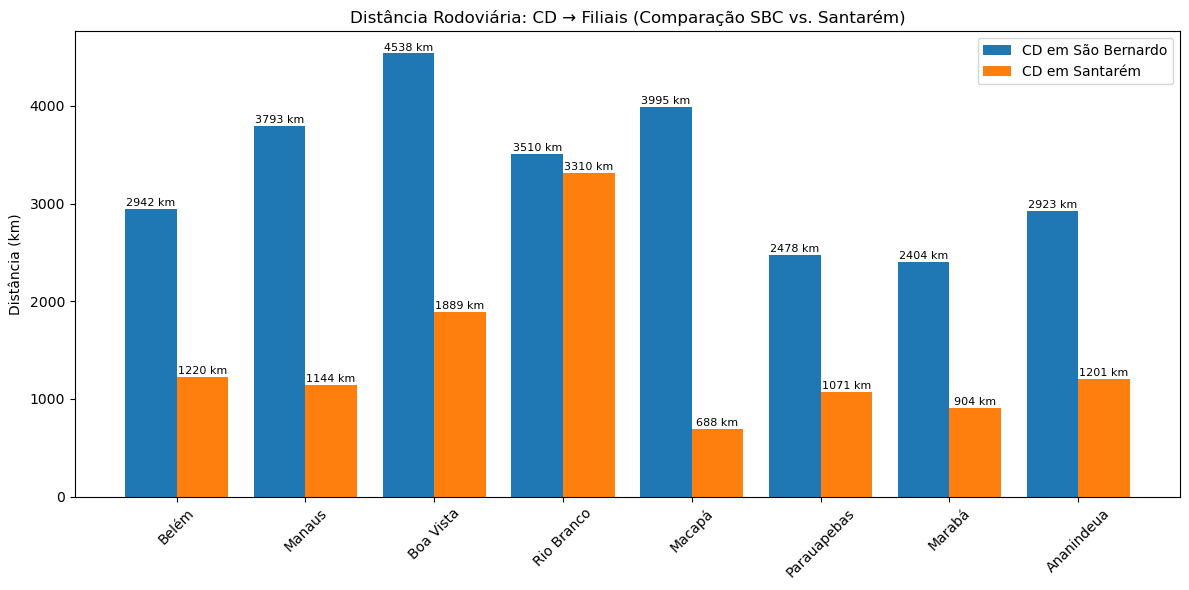

In [ ]:
# Coordenadas das cidades
pontos = {
    "São Bernardo do Campo": (-23.6914, -46.5658),
    "Santarém": (-2.4385, -54.6996),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Marabá": (-5.3686, -49.1172),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Função para pegar distância em km
def calcular_distancia(origem, destino):
    coords = (pontos[origem][::-1], pontos[destino][::-1])
    rota = client.directions(coords, profile='driving-car')
    return rota['routes'][0]['summary']['distance'] / 1000  # metros → km

# Coletar distâncias
filiais = [k for k in pontos if "Filial" in k]
dist_sbc = [calcular_distancia("São Bernardo do Campo", f) for f in filiais]
dist_santarem = [calcular_distancia("Santarém", f) for f in filiais]

# Plotar gráfico
plt.figure(figsize=(12, 6))
x = range(len(filiais))
bars1 = plt.bar(x, dist_sbc, width=0.4, label='CD em São Bernardo', align='center')
bars2 = plt.bar([i + 0.4 for i in x], dist_santarem, width=0.4, label='CD em Santarém', align='center')

# Adicionar rótulos
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{dist_sbc[i]:.0f} km', ha='center', va='bottom', fontsize=8)

for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{dist_santarem[i]:.0f} km', ha='center', va='bottom', fontsize=8)

# Estilização
plt.xticks([i + 0.2 for i in x], [f.replace("Filial - ", "") for f in filiais], rotation=45)
plt.ylabel('Distância (km)')
plt.title('Distância Rodoviária: CD → Filiais (Comparação SBC vs. Santarém)')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
dist_santarem

[1219.6647,
 1144.295,
 1889.2566000000002,
 3310.4883,
 687.7894,
 1070.9014,
 903.7107,
 1200.5165]

### Criando um novo mapa com rotas reais de um centro de distribuição em Santarém, para as filiais do Norte (Porto de Santarém --> CD2 (Santarém) --> Filiais do Norte)

In [ ]:
# Coordenadas dos pontos principais
pontos = {
    "Porto de Santarém": (-2.4385, -54.6996),
    "CD - Santarém": (-2.4385, -54.6996),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Marabá": (-5.3686, -49.1172),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Criar mapa
mapa = folium.Map(location=[-4, -54], zoom_start=5)

# Função para traçar rotas reais
def rota_real(origem, destino, cor):
    coords = (pontos[origem][::-1], pontos[destino][::-1])
    rota = client.directions(coords, profile='driving-car', format='geojson')
    folium.GeoJson(rota, name=f"{origem} → {destino}", style_function=lambda x: {'color': cor}).add_to(mapa)

# Marcadores
for nome, coord in pontos.items():
    cor = "blue" if "Filial" in nome else "green" if "CD" in nome else "red"
    folium.Marker(coord, popup=nome, icon=folium.Icon(color=cor)).add_to(mapa)

# Rota do Porto → CD (Santarém)
rota_real("Porto de Santarém", "CD - Santarém", "black")

# Rotas CD → Filiais
for filial in [k for k in pontos if "Filial" in k]:
    rota_real("CD - Santarém", filial, "brown")

# Salvar
# mapa.save("rotas_cd_santarem.html")
# print("Mapa salvo como 'rotas_cd_santarem.html'") 


### Mesmo mapa, porém ligados ao Porto de Pecém - São Gonçalo do Amarante

In [ ]:
# Coordenadas dos pontos principais
pontos = {
    # Tendo um CD2 em São Gonçalo do Amarante (CE)
    "Porto de Pecém (CD)": (-3.6050, -38.8361),  # São Gonçalo do Amarante - CE
    "Filial - Santarém": (-2.4385, -54.6996),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Marabá": (-5.3686, -49.1172),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Criar mapa com foco no Nordeste/Norte
mapa = folium.Map(location=[-5, -53], zoom_start=5)

# Função para traçar rotas reais
def rota_real(origem, destino, cor):
    coords = (pontos[origem][::-1], pontos[destino][::-1])
    rota = client.directions(coords, profile='driving-car', format='geojson')
    folium.GeoJson(rota, name=f"{origem} → {destino}", style_function=lambda x: {'color': cor}).add_to(mapa)

# Adicionar marcadores ao mapa
for nome, coord in pontos.items():
    cor = "blue" if "Filial" in nome else "green" if "CD" in nome else "red"
    folium.Marker(coord, popup=nome, icon=folium.Icon(color=cor)).add_to(mapa)

# Traçar rotas do CD para cada filial
for filial in [k for k in pontos if "Filial" in k]:
    rota_real("Porto de Pecém (CD)", filial, "brown")

# Salvar o mapa
# mapa.save("rotas_cd_pecem.html")
print("Mapa salvo como 'rotas_cd_pecem.html'")


C:\Users\Paulo\AppData\Roaming\Python\Python312\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 1st time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\Paulo\AppData\Roaming\Python\Python312\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\Paulo\AppData\Roaming\Python\Python312\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 3rd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\Paulo\AppData\Roaming\Python\Python312\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 4th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,


Mapa salvo como 'rotas_cd_pecem.html'


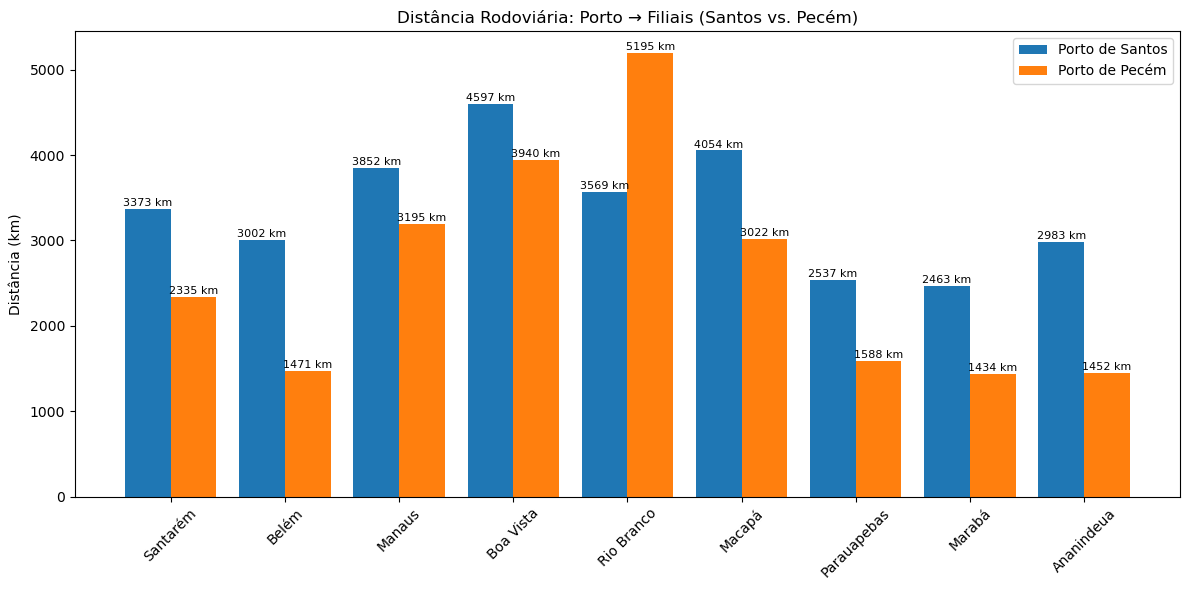

In [ ]:
# Comparação distancias entre Portos e Filiais
# Coordenadas dos Portos e filiais
pontos = {
    "Porto de Santos": (-23.9618, -46.3280),
    "Porto de Pecém": (-3.6050, -38.8361),  # São Gonçalo do Amarante - CE
    "Filial - Santarém": (-2.4385, -54.6996),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Marabá": (-5.3686, -49.1172),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Função para pegar distância em km
def calcular_distancia(origem, destino):
    coords = (pontos[origem][::-1], pontos[destino][::-1])
    rota = client.directions(coords, profile='driving-car')
    return rota['routes'][0]['summary']['distance'] / 1000  # metros → km

# Coletar distâncias
filiais = [k for k in pontos if "Filial" in k]
dist_santos = [calcular_distancia("Porto de Santos", f) for f in filiais]
dist_pecem = [calcular_distancia("Porto de Pecém", f) for f in filiais]

# Plotar gráfico
plt.figure(figsize=(12, 6))
x = range(len(filiais))
bars1 = plt.bar(x, dist_santos, width=0.4, label='Porto de Santos', align='center')
bars2 = plt.bar([i + 0.4 for i in x], dist_pecem, width=0.4, label='Porto de Pecém', align='center')

# Adicionar rótulos
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{dist_santos[i]:.0f} km', ha='center', va='bottom', fontsize=8)

for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{dist_pecem[i]:.0f} km', ha='center', va='bottom', fontsize=8)

# Estilização
plt.xticks([i + 0.2 for i in x], [f.replace("Filial - ", "") for f in filiais], rotation=45)
plt.ylabel('Distância (km)')
plt.title('Distância Rodoviária: Porto → Filiais (Santos vs. Pecém)')
plt.legend()
plt.tight_layout()
plt.show()


### CD em Belém + Porto de Belém

In [ ]:
# Coordenadas dos pontos principais
pontos = {
    "Porto de Belém": (-1.4558, -48.5020),  # Belém - PA
    "CD - Belém": (-1.4558, -48.5020),      # Mesmo local do porto
    "Filial - Santarém": (-2.4385, -54.6996),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Marabá": (-5.3686, -49.1172),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Criar o mapa centrado no norte
mapa = folium.Map(location=[-3, -52], zoom_start=5)

# Função para traçar rotas reais
def rota_real(origem, destino, cor):
    coords = (pontos[origem][::-1], pontos[destino][::-1])
    rota = client.directions(coords, profile='driving-car', format='geojson')
    folium.GeoJson(rota, name=f"{origem} → {destino}", style_function=lambda x: {'color': cor}).add_to(mapa)

# Marcadores
for nome, coord in pontos.items():
    cor = "blue" if "Filial" in nome else "green" if "CD" in nome else "red"
    folium.Marker(coord, popup=nome, icon=folium.Icon(color=cor)).add_to(mapa)

# Rota do Porto → CD (são o mesmo local nesse caso, então pode ser omitida ou traçada com uma cor neutra)

# Rotas CD → Filiais
for filial in [k for k in pontos if "Filial" in k]:
    rota_real("CD - Belém", filial, "brown")

# Salvar
# mapa.save("rotas_cd_belem.html")
print("Mapa salvo como 'rotas_cd_belem.html'")

Mapa salvo como 'rotas_cd_belem.html'


### CD Marabá + Porto Pecém

In [ ]:
# Coordenadas dos pontos principais
pontos = {
    "Porto de Pecém": (-3.6053, -38.7734),  # São Gonçalo do Amarante - CE
    "CD - Marabá": (-5.3686, -49.1172),     # Novo CD
    "Filial - Santarém": (-2.4385, -54.6996),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Criar mapa
mapa = folium.Map(location=[-5, -51], zoom_start=5)

# Função para traçar rotas reais
def rota_real(origem, destino, cor):
    coords = (pontos[origem][::-1], pontos[destino][::-1])
    rota = client.directions(coords, profile='driving-car', format='geojson')
    folium.GeoJson(rota, name=f"{origem} → {destino}", style_function=lambda x: {'color': cor}).add_to(mapa)

# Marcadores
for nome, coord in pontos.items():
    if nome == "Porto de Pecém":
        cor = "purple"  # destaque diferente
    elif "CD" in nome:
        cor = "green"
    elif "Filial" in nome:
        cor = "blue"
    else:
        cor = "red"
    folium.Marker(coord, popup=nome, icon=folium.Icon(color=cor)).add_to(mapa)

# Rota do Porto de Pecém → CD Marabá
rota_real("Porto de Pecém", "CD - Marabá", "black")

# Rotas do CD em Marabá → Filiais
for filial in [k for k in pontos if "Filial" in k]:
    rota_real("CD - Marabá", filial, "brown")

# Salvar (opcional)
# mapa.save("rotas_pecem_maraba.html")
print("Mapa salvo como 'rotas_pecem_maraba.html'")

Mapa salvo como 'rotas_pecem_maraba.html'


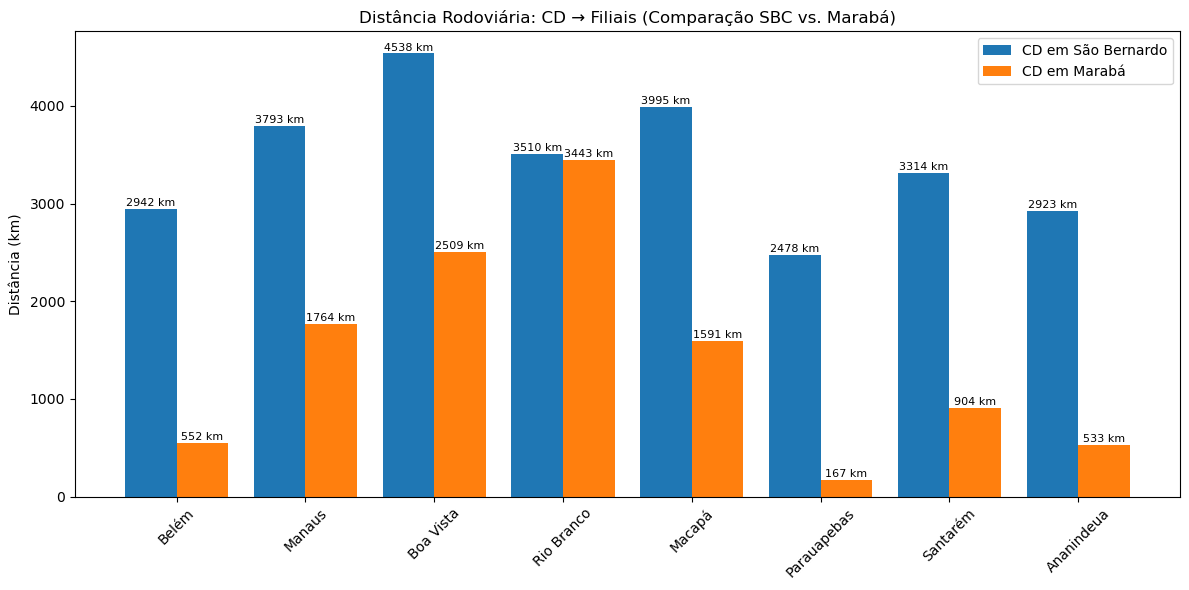

In [ ]:
# Coordenadas das cidades
pontos = {
    "São Bernardo do Campo": (-23.6914, -46.5658),
    "Marabá": (-5.3686, -49.1172),
    "Filial - Belém": (-1.4558, -48.5020),
    "Filial - Manaus": (-3.1190, -60.0217),
    "Filial - Boa Vista": (2.8235, -60.6758),
    "Filial - Rio Branco": (-9.9740, -67.8114),
    "Filial - Macapá": (0.0349, -51.0695),
    "Filial - Parauapebas": (-6.0671, -49.9037),
    "Filial - Santarém": (-2.4385, -54.6996),
    "Filial - Ananindeua": (-1.3656, -48.3721)
}

# Função para pegar distância em km (com tratamento de erro)
def calcular_distancia(origem, destino):
    try:
        coords = (pontos[origem][::-1], pontos[destino][::-1])
        rota = client.directions(coords, profile='driving-car')

        # Verificação da resposta
        if rota and 'routes' in rota and rota['routes']:
            resumo = rota['routes'][0].get('summary', {})
            if 'distance' in resumo:
                return resumo['distance'] / 1000  # metros → km
        
        # Caso a chave 'distance' não esteja presente
        print(f"⚠️ Não foi possível obter a distância entre {origem} e {destino}. Resposta da API: {rota}")
        return None

    except Exception as e:
        print(f"Erro ao calcular distância entre {origem} e {destino}: {e}")
        return None
    
""" 
MOTIVO DO ERRO ACIMA: A API estava tentando calcular a distancia de Marabá x Marabá (tipo um erro de divisão por zero), pois no dicionário de pontos
Marabá estava como "Filial - Marabá".

Solução: Tirar o "Filial -", e deixar somente Marabá.

"""

# Coletar distâncias
filiais = [k for k in pontos if "Filial" in k]
dist_sbc = [calcular_distancia("São Bernardo do Campo", f) for f in filiais]
dist_maraba = [calcular_distancia("Marabá", f) for f in filiais]

# Plotar gráfico
plt.figure(figsize=(12, 6))
x = range(len(filiais))
bars1 = plt.bar(x, dist_sbc, width=0.4, label='CD em São Bernardo', align='center')
bars2 = plt.bar([i + 0.4 for i in x], dist_maraba, width=0.4, label='CD em Marabá', align='center')

# Adicionar rótulos
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{dist_sbc[i]:.0f} km', ha='center', va='bottom', fontsize=8)

for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{dist_maraba[i]:.0f} km', ha='center', va='bottom', fontsize=8)

# Estilização
plt.xticks([i + 0.2 for i in x], [f.replace("Filial - ", "") for f in filiais], rotation=45)
plt.ylabel('Distância (km)')
plt.title('Distância Rodoviária: CD → Filiais (Comparação SBC vs. Marabá)')
plt.legend()
plt.tight_layout()
plt.show()